In [1]:
import numpy as np
import torch
import ternary
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from ensemblecalibration.cal_estimates.kde_ece import ece_kde_obj, get_bandwidth
from ensemblecalibration.cal_estimates.skce import skce_obj
from ensemblecalibration.cal_estimates.brier import brier_obj
from ensemblecalibration.cal_estimates.mmd_kce import mmd_kce_obj

from ensemblecalibration.utils.helpers import multinomial_label_sampling

In [2]:
def sample_from_categorical(p, n_samples=100):
    categories = np.arange(len(p))
    samples = np.random.choice(categories, size=n_samples, p=p)
    return samples

In [3]:
def miscalibration_estimate(p_probs, n_samples=1000, p_true = np.array([1/10, 1/10, 9/10]),
                             cal_estimate = "L2"):
    # Sample from the categorical distribution induced by the probability vector `p`
    if cal_estimate == "L2":
        params = {"p": 2, "bw": 0.01}
        miscal_obj = ece_kde_obj
    elif cal_estimate == "SKCE":
        params = {"bw": 0.01}
        miscal_obj = skce_obj
    elif cal_estimate == "Brier":
        params = {}
        miscal_obj = brier_obj
    elif cal_estimate == "MMD":
        params = {"bw": 0.001}
        miscal_obj = mmd_kce_obj
    else:
        raise ValueError("Invalid calibration estimate")
    p_true = np.tile(p_true, (n_samples, 1))
    y_labels = np.apply_along_axis(multinomial_label_sampling, 1, p_true)
    p_probs = np.tile(p_probs, (n_samples, 1))
    miscalibration = miscal_obj(p_probs, y_labels, params)
    return miscalibration

In [7]:

# Create a grid over the 3-simplex
scale = 40  # Resolution of the grid (higher value gives finer grid)
heatmap_data_brier = {}

# Loop over all points in the simplex (each point represents a probability distribution)
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert grid indices to a probability distribution
        p = np.array([i, j, k]) / scale
        # Evaluate the miscalibration function at this point
        heatmap_data_brier[(i, j)] = miscalibration_estimate(p, cal_estimate="Brier")


In [8]:

# Create a grid over the 3-simplex
scale = 40  # Resolution of the grid (higher value gives finer grid)
heatmap_data_l2 = {}

# Loop over all points in the simplex (each point represents a probability distribution)
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert grid indices to a probability distribution
        p = np.array([i, j, k]) / scale
        # Evaluate the miscalibration function at this point
        heatmap_data_l2[(i, j)] = miscalibration_estimate(p, cal_estimate="L2")

In [9]:

# Create a grid over the 3-simplex
scale = 40  # Resolution of the grid (higher value gives finer grid)
heatmap_data_skce = {}

# Loop over all points in the simplex (each point represents a probability distribution)
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert grid indices to a probability distribution
        p = np.array([i, j, k]) / scale
        # Evaluate the miscalibration function at this point
        heatmap_data_skce[(i, j)] = miscalibration_estimate(p, cal_estimate="SKCE")

/Users/mirajuergens/Library/CloudStorage/OneDrive-UGent/Code/EnsembleCalibration/ensemblecalibration/cal_estimates/skce.py:165: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1719361022906/work/aten/src/ATen/native/TensorShape.cpp:3679.)
  h_ij = torch.matmul(y_ii.T, torch.matmul(gamma_ij, y_jj))


In [4]:

# Create a grid over the 3-simplex
scale = 40  # Resolution of the grid (higher value gives finer grid)
heatmap_data_mmd = {}

# Loop over all points in the simplex (each point represents a probability distribution)
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert grid indices to a probability distribution
        p = np.array([i, j, k]) / scale
        # Evaluate the miscalibration function at this point
        heatmap_data_mmd[(i, j)] = miscalibration_estimate(p, cal_estimate="MMD")

In [6]:
heatmap_data_mmd

{(0, 0): tensor(0.0462),
 (0, 1): tensor(0.0439),
 (0, 2): tensor(0.0333),
 (0, 3): tensor(0.0307),
 (0, 4): tensor(0.0138),
 (0, 5): tensor(0.0153),
 (0, 6): tensor(0.0139),
 (0, 7): tensor(0.0155),
 (0, 8): tensor(0.0160),
 (0, 9): tensor(0.0297),
 (0, 10): tensor(0.0299),
 (0, 11): tensor(0.0556),
 (0, 12): tensor(0.0576),
 (0, 13): tensor(0.0878),
 (0, 14): tensor(0.0877),
 (0, 15): tensor(0.1018),
 (0, 16): tensor(0.1250),
 (0, 17): tensor(0.1429),
 (0, 18): tensor(0.1815),
 (0, 19): tensor(0.2343),
 (0, 20): tensor(0.2573),
 (0, 21): tensor(0.2784),
 (0, 22): tensor(0.3431),
 (0, 23): tensor(0.3568),
 (0, 24): tensor(0.4392),
 (0, 25): tensor(0.4517),
 (0, 26): tensor(0.4707),
 (0, 27): tensor(0.5579),
 (0, 28): tensor(0.6114),
 (0, 29): tensor(0.6500),
 (0, 30): tensor(0.7545),
 (0, 31): tensor(0.7536),
 (0, 32): tensor(0.8031),
 (0, 33): tensor(0.9569),
 (0, 34): tensor(0.9689),
 (0, 35): tensor(1.0916),
 (0, 36): tensor(1.1693),
 (0, 37): tensor(1.2196),
 (0, 38): tensor(1.285

/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/2758237216.py:15: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {k: np.log(v) for k, v in data.items()}
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/2758237216.py:15: RuntimeWarning: invalid value encountered in log
  log_heatmap_data = {k: np.log(v) for k, v in data.items()}


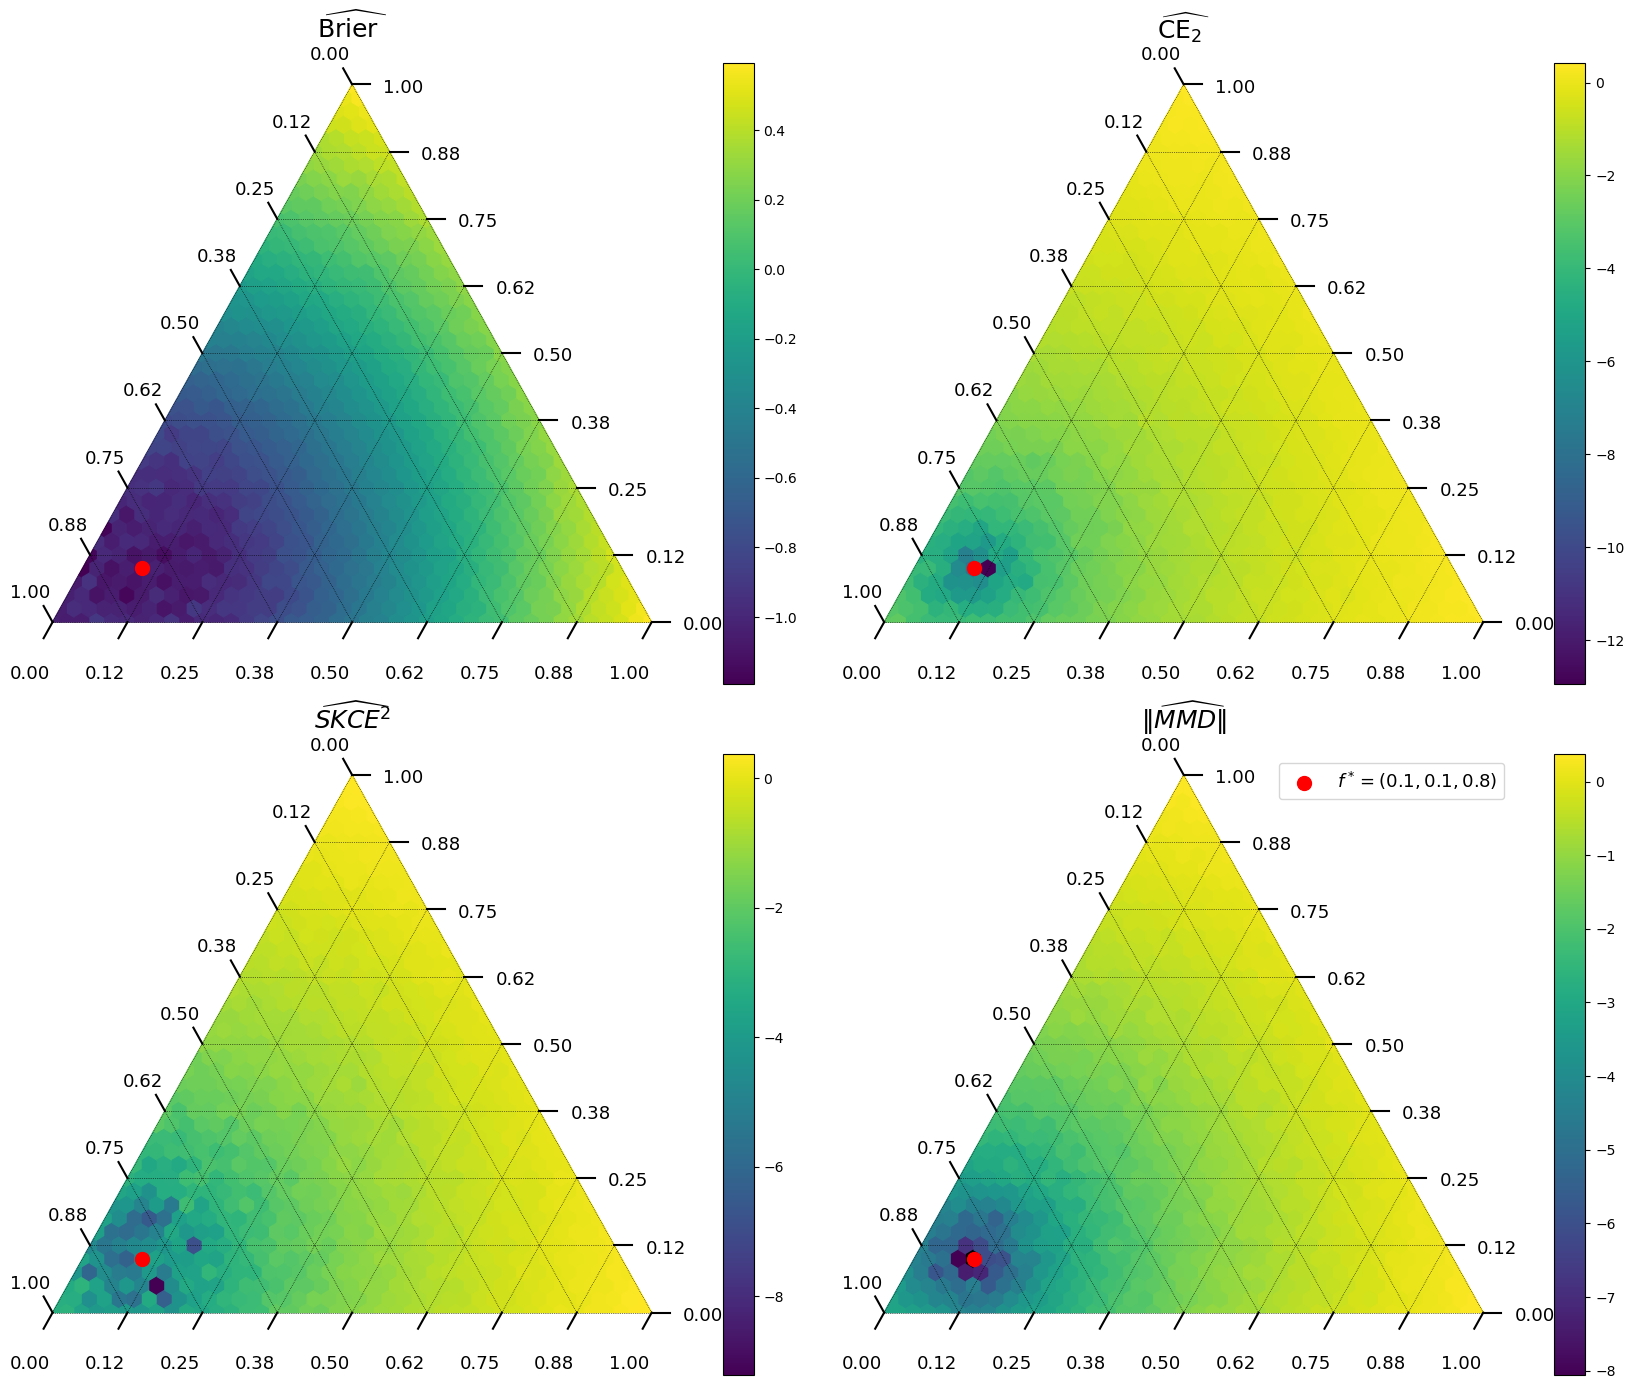

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(17, 14))
ax = ax.ravel()

for i, (data, title) in enumerate(
    zip(
        [heatmap_data_brier, heatmap_data_l2, heatmap_data_skce, heatmap_data_mmd],
        [r"$\widehat{\text{Brier}}$", r"$\widehat{\text{CE}_2}$", r"$\widehat{SKCE}^2$", r"$\| \widehat{MMD} \|$"],
    )
):
    ax[i].set_title(title, fontsize=18, pad=18)
    tax = ternary.TernaryAxesSubplot(ax=ax[i], scale=scale)
    tax.gridlines(multiple=5, color="black")

    #eps = 1e-10
    log_heatmap_data = {k: np.log(v) for k, v in data.items()}
    tax.heatmap(log_heatmap_data, scale=scale, style="hexagonal", cmap="viridis", colorbar=True)
    # change size of ticks of colorbar

    tick_multiple = 5  # Spacing between ticks in grid units
    tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
    tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

    point = (1/10 * scale, 1/10 * scale, 9/10 * scale)

    # Plot the point in the simplex with a large marker size
    tax.scatter([point], marker='o', color='red', s=100, label="$f^* = (0.1, 0.1, 0.8)$")



    tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
    tax.get_ticks_from_axis_limits(multiple=tick_multiple)
    tax.set_custom_ticks(tick_formats="%.2f", offset=0.03, fontsize=13)
    # Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
    # tax.ticks(
    #     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
    #     multiple=tick_multiple,  # Normalize tick values by dividing by scale
    #     offset=0.02,
    #     linewidth=1
    # )
    # Set ticks and titles
    #tax.ticks(axis='lbr', multiple=5)
    tax.clear_matplotlib_ticks()
    

    tax.get_axes().axis('off')
plt.legend(fontsize=13)


# Show the plot
plt.tight_layout()

plt.savefig("../figures/heatmap_cal_estimates.png", dpi=400)


    

<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/875321645.py:41: SyntaxWarning: invalid escape sequence '\l'
  tax.get_axes().set_title("Brier Score, \n $\log$ scale", fontsize=18, pad=10)
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/875321645.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {k: np.log(v) for k, v in heatmap_data_brier.items()}


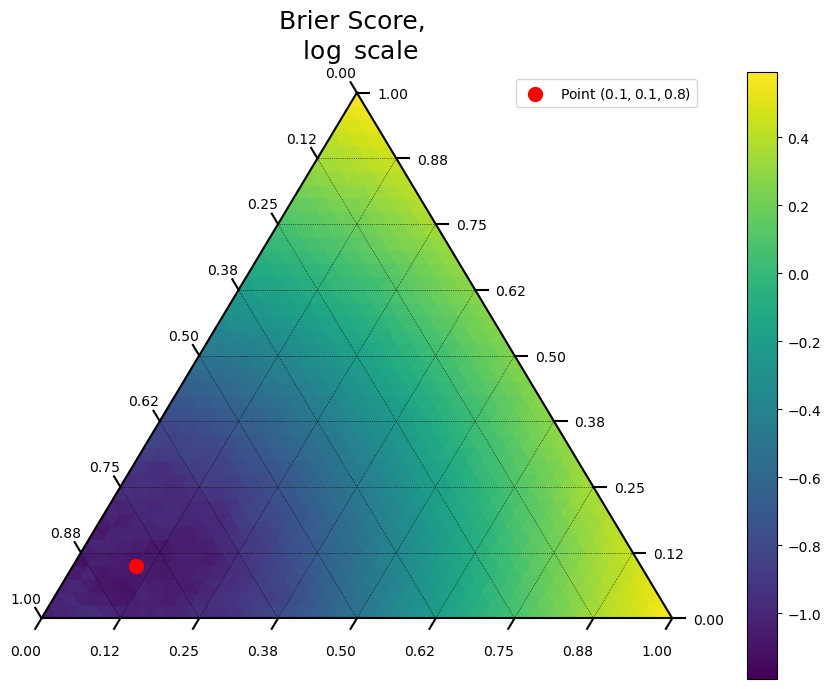

In [12]:
# Set up the figure and ternary plot
fig, ax = plt.subplots(figsize=(9, 7))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=scale)

# Draw boundary and gridlines
tax.boundary()
tax.gridlines(multiple=5, color="black")

log_heatmap_data = {k: np.log(v) for k, v in heatmap_data_brier.items()}
# Plot the heatmap
tax.heatmap(log_heatmap_data, scale=scale, cmap='viridis', colorbar=True)

# # Set axis labels
# tax.left_axis_label("Class 1", fontsize=12, offset=0.1)
# tax.right_axis_label("Class 2", fontsize=12, offset=0.12)
# tax.bottom_axis_label("Class 3", fontsize=12, offset=-0.05)

# Create tick labels for each axis normalized within [0,1]
tick_multiple = 5  # Spacing between ticks in grid units
tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

point = (1/10 * scale, 1/10 * scale, 9/10 * scale)

# Plot the point in the simplex with a large marker size
tax.scatter([point], marker='o', color='red', s=100, label="Point $(0.1, 0.1, 0.8)$")

tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
tax.get_ticks_from_axis_limits(multiple=tick_multiple)
tax.set_custom_ticks(tick_formats="%.2f", offset=0.02)
# Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
# tax.ticks(
#     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
#     multiple=tick_multiple,  # Normalize tick values by dividing by scale
#     offset=0.02,
#     linewidth=1
# )
# Set ticks and titles
#tax.ticks(axis='lbr', multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().set_title("Brier Score, \n $\log$ scale", fontsize=18, pad=10)
# remove default axis
tax.get_axes().axis('off')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<>:43: SyntaxWarning: invalid escape sequence '\l'
<>:43: SyntaxWarning: invalid escape sequence '\l'
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/1388267311.py:43: SyntaxWarning: invalid escape sequence '\l'
  tax.get_axes().set_title("L2 Score, \n $\log$ scale", fontsize=18, pad=10)
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/1388267311.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {key: np.log(value) for key, value in heatmap_data_l2.items()}


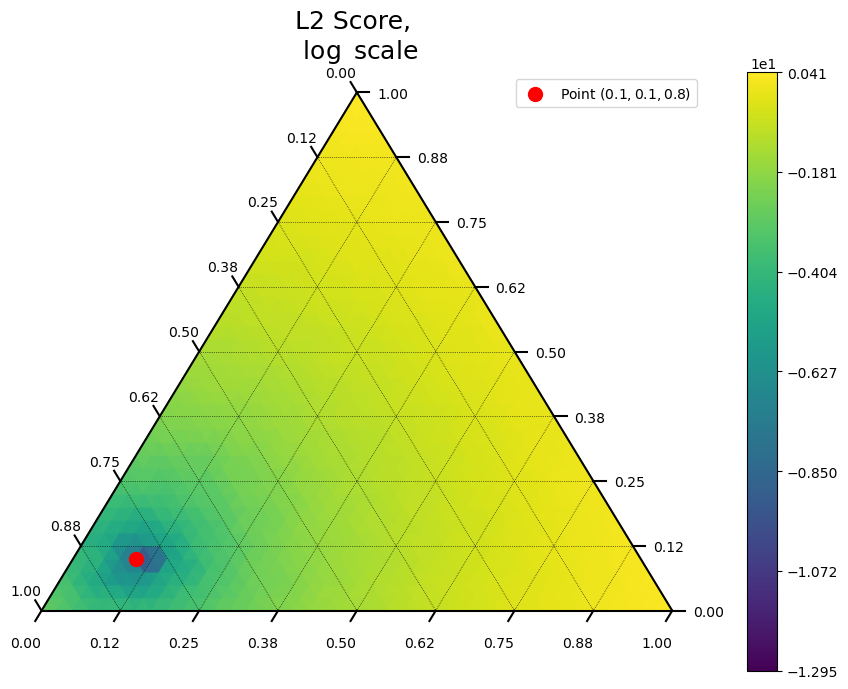

In [13]:
scale = 40

fig, ax = plt.subplots(figsize=(9, 7))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=scale)

# Draw boundary and gridlines
tax.boundary()
tax.gridlines(multiple=5, color="black")

log_heatmap_data = {key: np.log(value) for key, value in heatmap_data_l2.items()}

# Plot the heatmap
tax.heatmap(log_heatmap_data, scale=scale, cmap='viridis', colorbar=True, scientific=True)

# # Set axis labels
# tax.left_axis_label("Class 1", fontsize=12, offset=0.1)
# tax.right_axis_label("Class 2", fontsize=12, offset=0.12)
# tax.bottom_axis_label("Class 3", fontsize=12, offset=-0.05)

# Create tick labels for each axis normalized within [0,1]
tick_multiple = 5  # Spacing between ticks in grid units
tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

point = (1/10 * scale, 1/10 * scale,9/10 * scale)  # Scale the point to match the heatmap

# Plot the point in the simplex with a large marker size
tax.scatter([point], marker='o', color='red', s=100, label="Point $(0.1, 0.1, 0.8)$")

tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
tax.get_ticks_from_axis_limits(multiple=tick_multiple)
tax.set_custom_ticks(tick_formats="%.2f", offset=0.02)
# Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
# tax.ticks(
#     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
#     multiple=tick_multiple,  # Normalize tick values by dividing by scale
#     offset=0.02,
#     linewidth=1
# )
# Set ticks and titles
#tax.ticks(axis='lbr', multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().set_title("L2 Score, \n $\log$ scale", fontsize=18, pad=10)
# remove default axis
tax.get_axes().axis('off')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/894121862.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {key: np.log(value + eps) for key, value in heatmap_data_skce.items()}


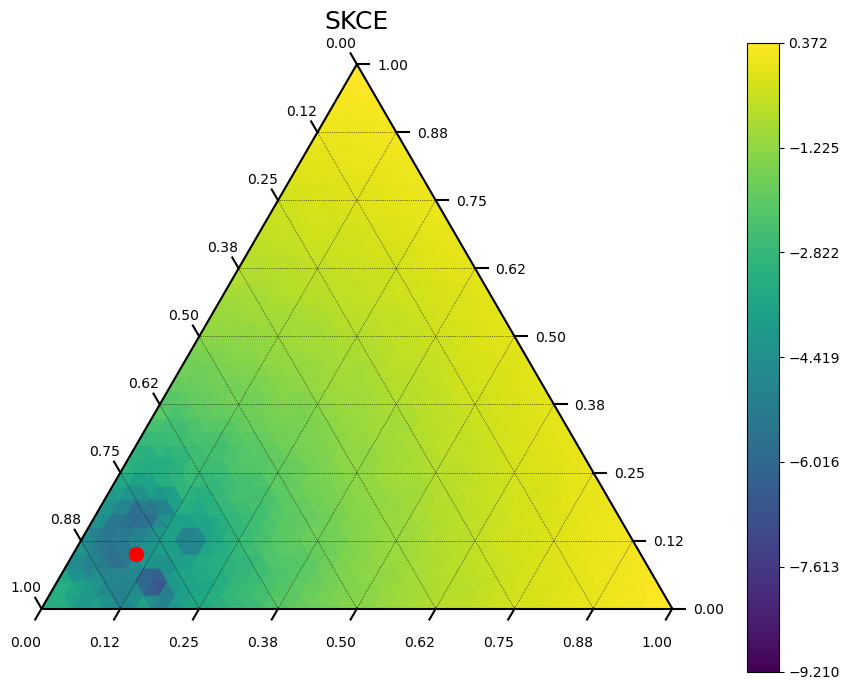

In [14]:
scale = 40
fig, ax = plt.subplots(figsize=(9, 7))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=scale)

# Draw boundary and gridlines
tax.boundary()
tax.gridlines(multiple=5, color="black")

eps = 1e-10
log_heatmap_data = {key: np.log(value + eps) for key, value in heatmap_data_skce.items()}

# Plot the heatmap
tax.heatmap(log_heatmap_data, scale=scale, cmap='viridis', colorbar=True, scientific=True)

# # Set axis labels
# tax.left_axis_label("Class 1", fontsize=12, offset=0.1)
# tax.right_axis_label("Class 2", fontsize=12, offset=0.12)
# tax.bottom_axis_label("Class 3", fontsize=12, offset=-0.05)

# Create tick labels for each axis normalized within [0,1]
tick_multiple = 5  # Spacing between ticks in grid units
tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

point = (1/10 * scale, 1/10 * scale, 9/10 * scale)  # Scale the point to match the heatmap

# Plot the point in the simplex with a large marker size
tax.scatter([point], marker='o', color='red', s=100, label="Point (1/3, 1/3, 1/3)")

tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
tax.get_ticks_from_axis_limits(multiple=tick_multiple)
tax.set_custom_ticks(tick_formats="%.2f", offset=0.02)
# Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
# tax.ticks(
#     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
#     multiple=tick_multiple,  # Normalize tick values by dividing by scale
#     offset=0.02,
#     linewidth=1
# )
# Set ticks and titles
#tax.ticks(axis='lbr', multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().set_title("SKCE", fontsize=18, pad=10)
# remove default axis
tax.get_axes().axis('off')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/189104091.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  log_heatmap_data = {key: np.log(value) for key, value in heatmap_data_mmd.items()}
/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_57460/189104091.py:9: RuntimeWarning: invalid value encountered in log
  log_heatmap_data = {key: np.log(value) for key, value in heatmap_data_mmd.items()}
/Users/mirajuergens/opt/miniconda3/envs/calibration_2/lib/python3.12/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


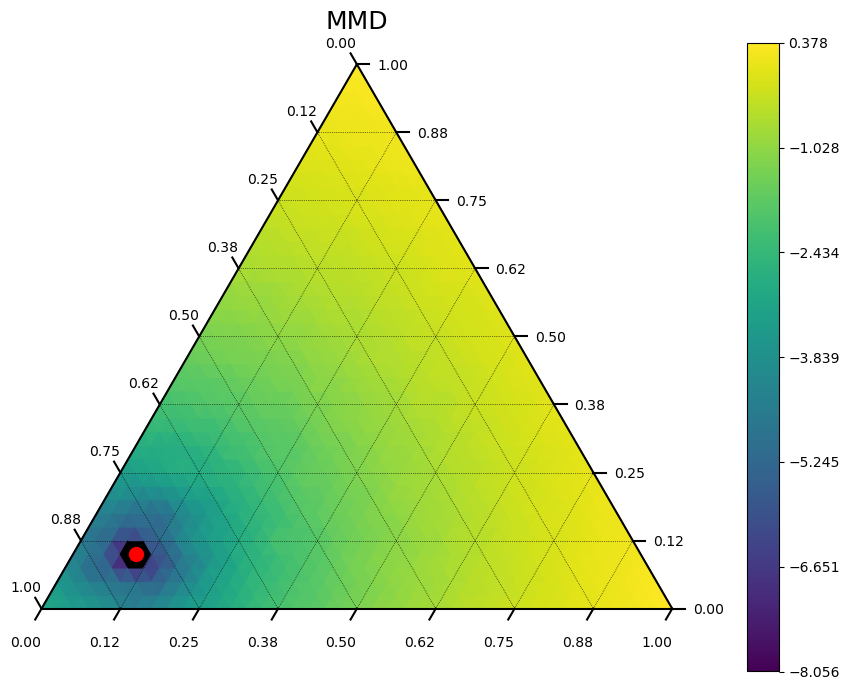

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=scale)

# Draw boundary and gridlines
tax.boundary()
tax.gridlines(multiple=5, color="black")

eps = 1e-6
log_heatmap_data = {key: np.log(value) for key, value in heatmap_data_mmd.items()}

tax.heatmap(log_heatmap_data, scale=scale, cmap='viridis', colorbar=True, scientific=True)

# Plot the heatmap
#tax.heatmap(heatmap_data_mmd, scale=scale, cmap='viridis', colorbar=True)

# # Set axis labels
# tax.left_axis_label("Class 1", fontsize=12, offset=0.1)
# tax.right_axis_label("Class 2", fontsize=12, offset=0.12)
# tax.bottom_axis_label("Class 3", fontsize=12, offset=-0.05)

# Create tick labels for each axis normalized within [0,1]
tick_multiple = 5  # Spacing between ticks in grid units
tick_values = np.arange(0, scale+1, tick_multiple)  # Tick positions
tick_labels = [f"{i/scale:.1f}" for i in tick_values]  # Normalized tick labels

point = (1/10 * scale, 1/10 * scale, 9/10 * scale)  # Scale the point to match the heatmap
# Plot the point in the simplex with a large marker size
tax.scatter([point], marker='o', color='red', s=100, label="Point (1/3, 1/3, 1/3)")

tax.set_axis_limits({'b': [0, 1], 'l': [0, 1], 'r': [0, 1]})
tax.get_ticks_from_axis_limits(multiple=tick_multiple)
tax.set_custom_ticks(tick_formats="%.2f", offset=0.02)
# Set ticks on the 'left', 'bottom', and 'right' axes with normalized labels
# tax.ticks(
#     axis='lbr',  # 'l' for left, 'b' for bottom, 'r' for right axis
#     multiple=tick_multiple,  # Normalize tick values by dividing by scale
#     offset=0.02,
#     linewidth=1
# )
# Set ticks and titles
#tax.ticks(axis='lbr', multiple=5)
tax.clear_matplotlib_ticks()
tax.get_axes().set_title("MMD", fontsize=18, pad=10)
# remove default axis
tax.get_axes().axis('off')

# Show the plot
plt.tight_layout()
plt.show()